# Cat vs Non-cat Classification

Using a Deep Feedforward Neural Network for classifying cats vs non-cats.

_PyTorch implementation of the assignment of Course 1 of Coursera's Deep Learning Specialization_.

## Imports

In [1]:
%matplotlib inline

import h5py
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
import torchvision.transforms as transforms
import torchvision.utils as vutils

from torch.utils.data import DataLoader, Dataset

## Reproducibility

In [2]:
seed = 24
random.seed(seed)
torch.manual_seed(seed);

## Dataset

We will create a custom dataset that can load the images from the given `.h5` files. The files contain:

- 209 training examples
- 50 testing examples
- each image is of size: (64, 64, 3)

In [3]:
class CatsDataset(Dataset):
    def __init__(self, train, transform=None):
        prefix = 'train' if train else 'test'
        dataset = h5py.File(f'data/{prefix}_catvnoncat.h5', 'r')

        self.X = np.array(dataset[f'{prefix}_set_x'][:])
        # Reshape target values to be of shape (sample_size, 1)
        self.y = np.array(dataset[f'{prefix}_set_y'][:]).reshape(self.X.shape[0], 1)
        self.transform = transform

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        X = self.transform(self.X[idx, :]) if self.transform else self.X[idx, :]
        y = self.y[idx, :]   
        
        return X, y

We can now create training and test sets. We use `ToTensor()` to convert the images to a PyTorch tensor with shape channels x height x width, and with pixel values rescaled from [0, 255] to [0, 1].

In [4]:
training = DataLoader(CatsDataset(train=True, transform=transforms.ToTensor()), batch_size=64, shuffle=True, num_workers=4)
testing = DataLoader(CatsDataset(train=False, transform=transforms.ToTensor()), batch_size=64, shuffle=True, num_workers=4)

Let's look at some examples from the training set.

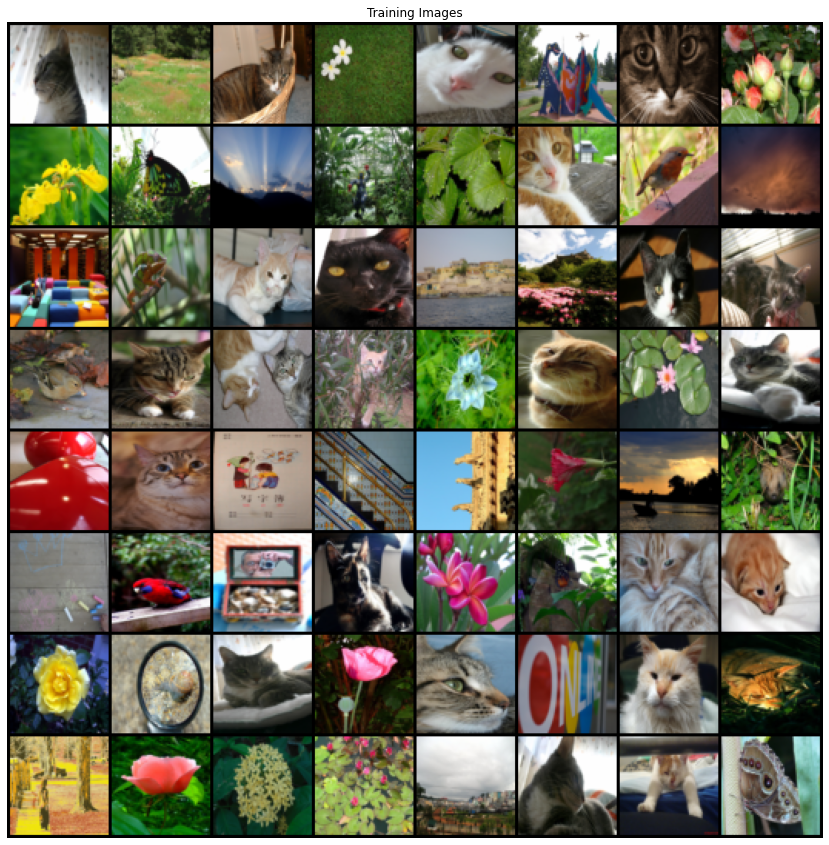

In [5]:
batch = next(iter(training))
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.title('Training Images')
# We need to swap the axes to (height, width, channels) for matplotlib to plot the image correctly
plt.imshow(np.transpose(vutils.make_grid(batch[0], padding=2, normalize=True), (1, 2, 0)));